<a href="https://colab.research.google.com/github/EyaSriwi/Weather-APP/blob/main/App_weather_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install streamlit

In [3]:
!pip install SpeechRecognition
!pip install pyttsx3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 36.6 MB/s eta 0:00:00


In [4]:
!pip install requests

In [5]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import sqlite3

from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error ,accuracy_score, precision_score, recall_score, f1_score , r2_score
from sklearn.model_selection import train_test_split

In [6]:
url = "https://archive-api.open-meteo.com/v1/archive?latitude=51.1657&longitude=10.4515&start_date=2000-03-24&end_date=2023-03-24&daily=weathercode,temperature_2m_mean,sunrise,sunset,shortwave_radiation_sum,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration&timezone=Africa%2FCairo"
response = requests.get(url)

data = response.json()

In [7]:
df = pd.DataFrame(data["daily"])
df

,time,weathercode,temperature_2m_mean,sunrise,sunset,shortwave_radiation_sum,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration
0,2000-03-24,55,7.9,2000-03-24T07:10,2000-03-24T19:37,6.54,3.9,3.9,0.00,9.0,13.2,34.6,109,0.95
1,2000-03-25,51,9.8,2000-03-25T07:08,2000-03-25T19:39,11.83,0.9,0.9,0.00,5.0,17.3,40.7,228,1.66
2,2000-03-26,51,6.7,2000-03-26T07:06,2000-03-26T19:40,9.64,1.0,1.0,0.00,4.0,16.8,38.5,216,1.25
3,2000-03-27,53,5.5,2000-03-27T07:03,2000-03-27T19:42,11.24,1.9,1.9,0.00,6.0,14.5,31.7,54,1.35
4,2000-03-28,71,3.2,2000-03-28T07:01,2000-03-28T19:44,5.26,1.1,1.0,0.21,6.0,13.8,27.7,341,0.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8396,2023-03-20,51,8.7,2023-03-20T07:21,2023-03-20T19:29,6.62,0.6,0.6,0.00,5.0,19.4,38.9,255,1.17
8397,2023-03-21,55,9.2,2023-03-21T07:18,2023-03-21T19:31,8.81,2.9,2.9,0.00,7.0,19.0,36.7,237,1.53
8398,2023-03-22,51,10.7,2023-03-22T07:16,2023-03-22T19:33,12.56,0.1,0.1,0.00,1.0,31.4,61.9,230,2.36
8399,2023-03-23,61,12.1,2023-03-23T07:14,2023-03-23T19:34,8.04,3.5,3.5,0.00,8.0,32.3,61.9,231,1.92


# prepare it for machine learning

In [8]:
df.head()

,time,weathercode,temperature_2m_mean,sunrise,sunset,shortwave_radiation_sum,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration
0,2000-03-24,55,7.9,2000-03-24T07:10,2000-03-24T19:37,6.54,3.9,3.9,0.00,9.0,13.2,34.6,109,0.95
1,2000-03-25,51,9.8,2000-03-25T07:08,2000-03-25T19:39,11.83,0.9,0.9,0.00,5.0,17.3,40.7,228,1.66
2,2000-03-26,51,6.7,2000-03-26T07:06,2000-03-26T19:40,9.64,1.0,1.0,0.00,4.0,16.8,38.5,216,1.25
3,2000-03-27,53,5.5,2000-03-27T07:03,2000-03-27T19:42,11.24,1.9,1.9,0.00,6.0,14.5,31.7,54,1.35
4,2000-03-28,71,3.2,2000-03-28T07:01,2000-03-28T19:44,5.26,1.1,1.0,0.21,6.0,13.8,27.7,341,0.72


In [9]:
df.columns

Index(['time', 'weathercode', 'temperature_2m_mean', 'sunrise', 'sunset',
       'shortwave_radiation_sum', 'precipitation_sum', 'rain_sum',
       'snowfall_sum', 'precipitation_hours', 'windspeed_10m_max',
       'windgusts_10m_max', 'winddirection_10m_dominant',
       'et0_fao_evapotranspiration'],
      dtype='object')

In [10]:
#rename columns
df.rename(columns={'time' : 'Date', 'weathercode' : 'Weather code', 'temperature_2m_mean' : 'Temperature', 'sunrise' :'Sunrise' , 'sunset':'Sunset',
       'shortwave_radiation_sum': 'Shortwave radiation','snowfall_sum':'snowfall', 'precipitation_sum' : 'Precipitation','rain_sum':'Rain',
       'precipitation_hours' :'Precipitation hours' ,'windspeed_10m_max': 'Wind speed',
       'windgusts_10m_max' : 'Windgusts', 'winddirection_10m_dominant' : 'Wind direction',
       'et0_fao_evapotranspiration' : 'Evapotranspiration'},inplace=True)
df

,Date,Weather code,Temperature,Sunrise,Sunset,Shortwave radiation,Precipitation,Rain,snowfall,Precipitation hours,Wind speed,Windgusts,Wind direction,Evapotranspiration
0,2000-03-24,55,7.9,2000-03-24T07:10,2000-03-24T19:37,6.54,3.9,3.9,0.00,9.0,13.2,34.6,109,0.95
1,2000-03-25,51,9.8,2000-03-25T07:08,2000-03-25T19:39,11.83,0.9,0.9,0.00,5.0,17.3,40.7,228,1.66
2,2000-03-26,51,6.7,2000-03-26T07:06,2000-03-26T19:40,9.64,1.0,1.0,0.00,4.0,16.8,38.5,216,1.25
3,2000-03-27,53,5.5,2000-03-27T07:03,2000-03-27T19:42,11.24,1.9,1.9,0.00,6.0,14.5,31.7,54,1.35
4,2000-03-28,71,3.2,2000-03-28T07:01,2000-03-28T19:44,5.26,1.1,1.0,0.21,6.0,13.8,27.7,341,0.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8396,2023-03-20,51,8.7,2023-03-20T07:21,2023-03-20T19:29,6.62,0.6,0.6,0.00,5.0,19.4,38.9,255,1.17
8397,2023-03-21,55,9.2,2023-03-21T07:18,2023-03-21T19:31,8.81,2.9,2.9,0.00,7.0,19.0,36.7,237,1.53
8398,2023-03-22,51,10.7,2023-03-22T07:16,2023-03-22T19:33,12.56,0.1,0.1,0.00,1.0,31.4,61.9,230,2.36
8399,2023-03-23,61,12.1,2023-03-23T07:14,2023-03-23T19:34,8.04,3.5,3.5,0.00,8.0,32.3,61.9,231,1.92


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8401 entries, 0 to 8400
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 8401 non-null   object 
 1   Weather code         8401 non-null   int64  
 2   Temperature          8401 non-null   float64
 3   Sunrise              8401 non-null   object 
 4   Sunset               8401 non-null   object 
 5   Shortwave radiation  8401 non-null   float64
 6   Precipitation        8401 non-null   float64
 7   Rain                 8401 non-null   float64
 8   snowfall             8401 non-null   float64
 9   Precipitation hours  8401 non-null   float64
 10  Wind speed           8401 non-null   float64
 11  Windgusts            8401 non-null   float64
 12  Wind direction       8401 non-null   int64  
 13  Evapotranspiration   8401 non-null   float64
dtypes: float64(9), int64(2), object(3)
memory usage: 919.0+ KB


In [12]:
df.describe()

,Weather code,Temperature,Shortwave radiation,Precipitation,Rain,snowfall,Precipitation hours,Wind speed,Windgusts,Wind direction,Evapotranspiration
count,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000
mean,34.617903,9.690370,10.972105,1.734377,1.580764,0.117978,3.857398,17.503750,37.582026,203.231401,1.935865
std,27.767173,7.384166,7.628184,3.375912,3.274933,0.581399,5.075796,6.764506,14.459729,88.246414,1.488522
min,0.000000,-14.200000,0.230000,0.000000,0.000000,0.000000,0.000000,3.300000,8.300000,0.000000,0.110000
25%,3.000000,4.000000,3.840000,0.000000,0.000000,0.000000,0.000000,12.300000,27.000000,122.000000,0.600000
50%,51.000000,9.800000,9.730000,0.200000,0.100000,0.000000,1.000000,16.600000,35.300000,230.000000,1.580000
75%,55.000000,15.600000,17.310000,2.100000,1.700000,0.000000,6.000000,21.600000,45.700000,265.000000,3.030000
max,75.000000,29.100000,29.940000,59.900000,59.900000,14.070000,24.000000,53.600000,123.100000,360.000000,7.820000


In [13]:
df.columns

Index(['Date', 'Weather code', 'Temperature', 'Sunrise', 'Sunset',
       'Shortwave radiation', 'Precipitation', 'Rain', 'snowfall',
       'Precipitation hours', 'Wind speed', 'Windgusts', 'Wind direction',
       'Evapotranspiration'],
      dtype='object')

in our data The important feature for predicting weather is :
Temperature, Precipitation, Wind speed, Wind direction, Shortwave radiation,Evapotranspiration







In [14]:
ds=df.drop(['Weather code','Sunrise','Sunset','Rain','snowfall','Windgusts','Precipitation hours'], axis=1)

In [15]:
ds.head()

,Date,Temperature,Shortwave radiation,Precipitation,Wind speed,Wind direction,Evapotranspiration
0,2000-03-24,7.9,6.54,3.9,13.2,109,0.95
1,2000-03-25,9.8,11.83,0.9,17.3,228,1.66
2,2000-03-26,6.7,9.64,1.0,16.8,216,1.25
3,2000-03-27,5.5,11.24,1.9,14.5,54,1.35
4,2000-03-28,3.2,5.26,1.1,13.8,341,0.72


# Visualisation

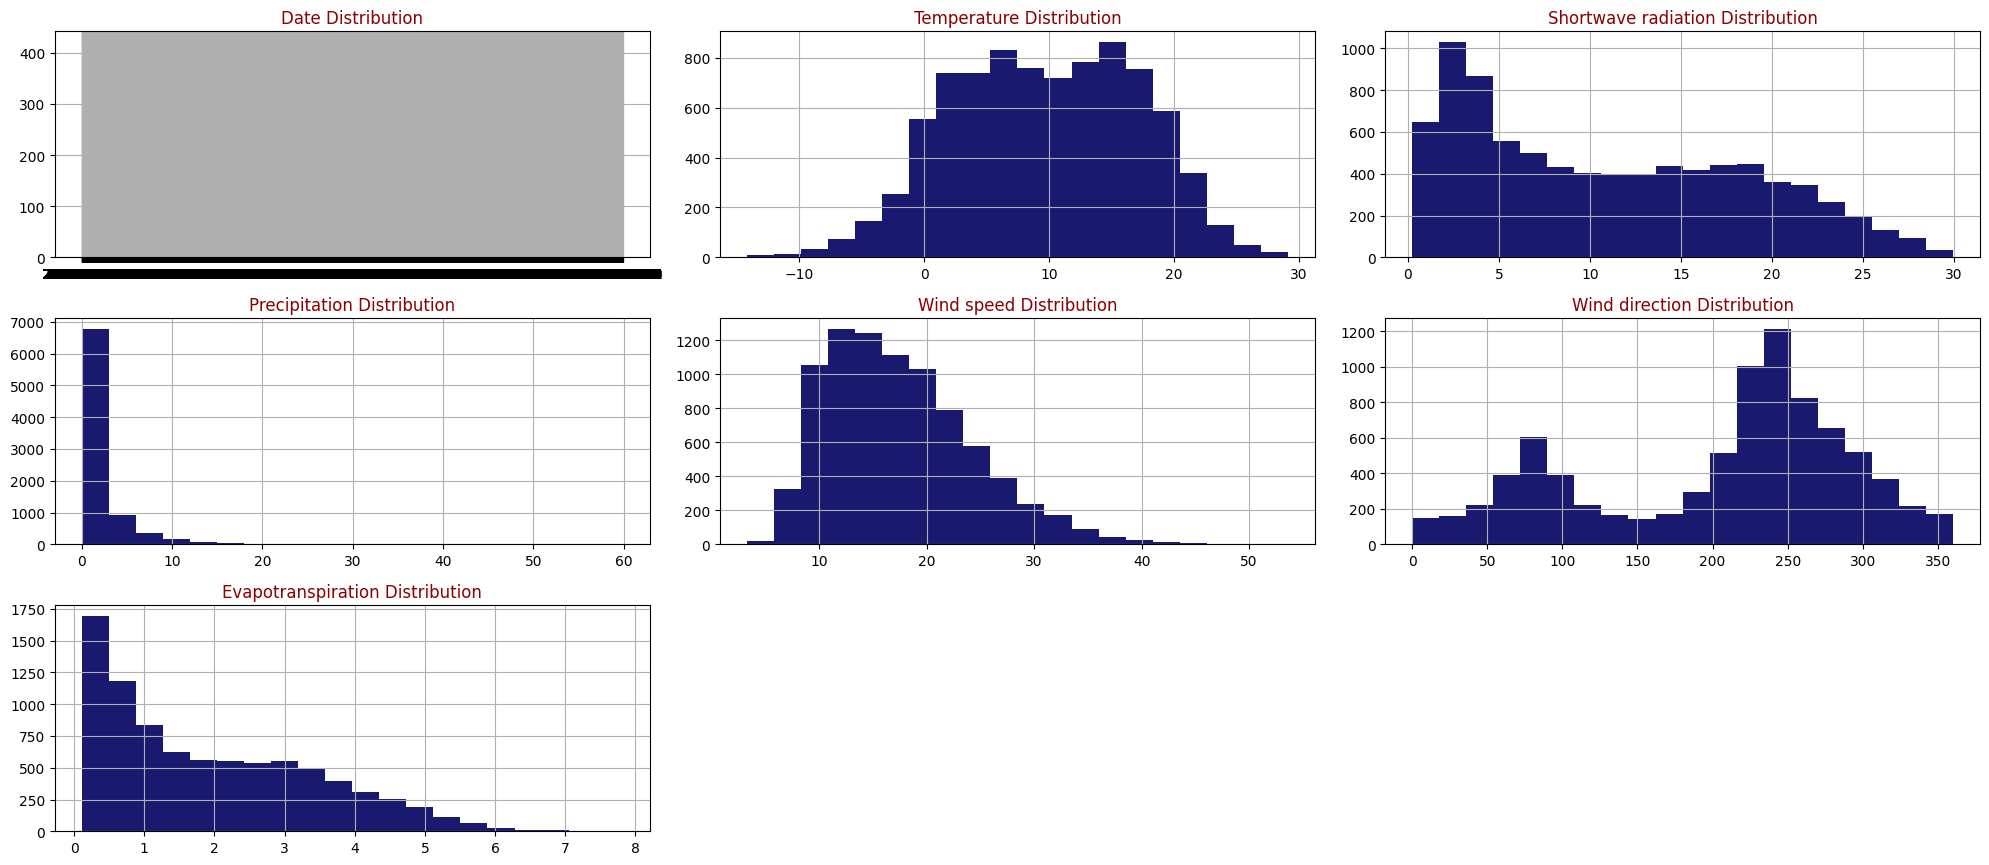

In [16]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')

    fig.tight_layout()
    plt.show()

draw_histograms(ds, ds.columns,7,3)

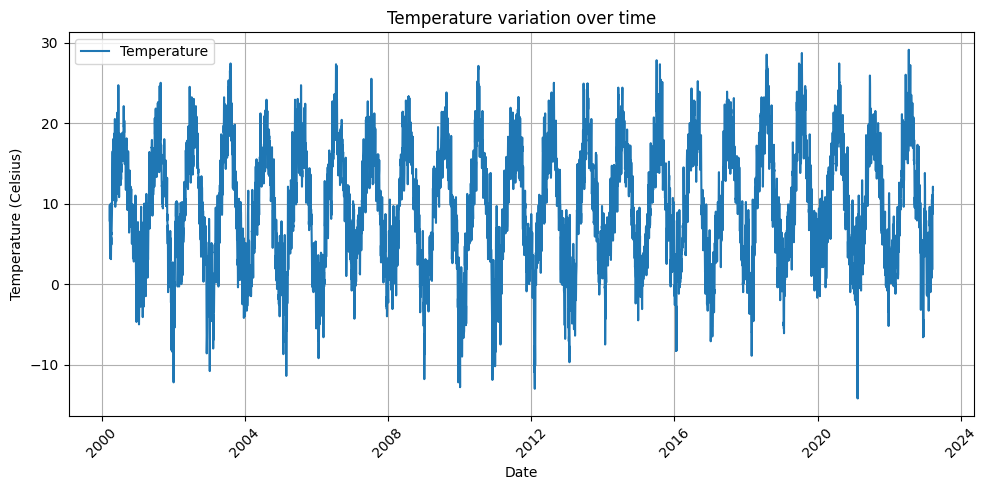

In [17]:
ds['Date'] = pd.to_datetime(ds['Date'])

# Plot the temperature column
plt.figure(figsize=(10, 5))
plt.plot(ds['Date'], ds['Temperature'], label='Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.title('Temperature variation over time')
plt.legend(loc='best')
plt.grid(True)  # Add grid lines for better readability
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

The plot shows the variation of temperature over time from 2000 to 2024, with time on the x-axis and temperature in Celsius on the y-axis. the temperature appears to vary over time in a cyclical pattern.
Another observation is that the temperature appears to have seasonal patterns, with the temperature increasing in the summer months and decreasing in the winter months.

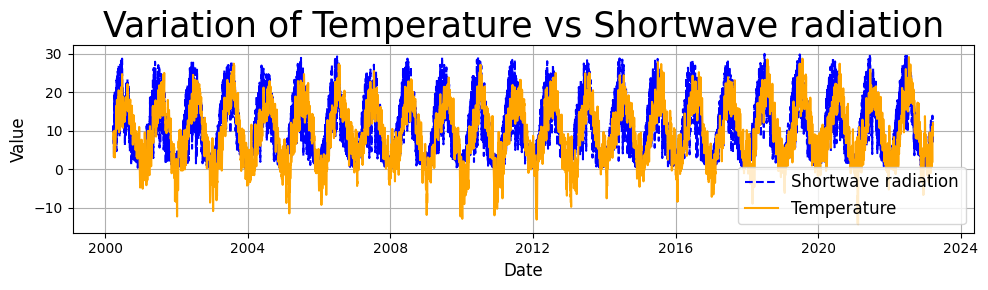

In [18]:
# Plot Shortwave radiation and Temperature
plt.figure(figsize=(10, 3))
plt.plot(ds['Date'], ds['Shortwave radiation'], label='Shortwave radiation', color='blue', linestyle='dashed')
plt.plot(ds['Date'], ds['Temperature'], label='Temperature', color='orange')
plt.title('Variation of Temperature vs Shortwave radiation', fontsize=25)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(loc='best', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

The plot shows the variation of shortwave radiation and temperature over time, with time on the x-axis and the variables on the y-axis.The dashed blue line represents the variation of shortwave radiation, while the orange line represents the variation of temperature. One observation from the plot is that there appears to be same relationship between shortwave radiation and temperature. This means that when shortwave radiation increases, the temperature increases too and vice versa.


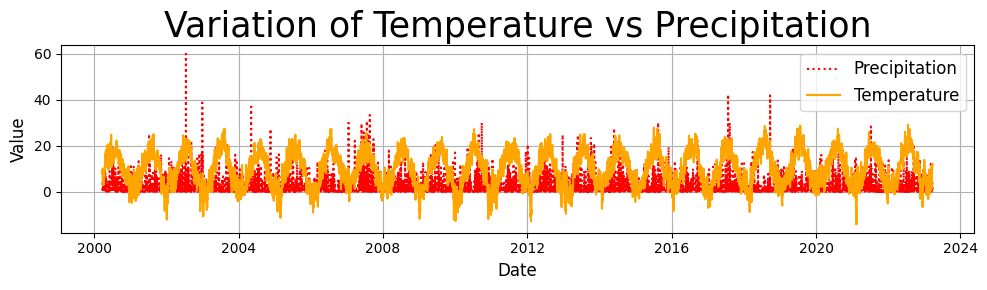

In [19]:
# Plot Precipitation and Temperature
plt.figure(figsize=(10, 3))
plt.plot(ds['Date'], ds['Precipitation'], label='Precipitation', color='red', linestyle='dotted')
plt.plot(ds['Date'], ds['Temperature'], label='Temperature', color='orange')
plt.title('Variation of Temperature vs Precipitation', fontsize=25)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(loc='best', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


Similar to the previous analysis, the plot shows the variation of temperature and precipitation over time. The orange line represents the variation of temperature, while the red dotted line represents the variation of precipitation

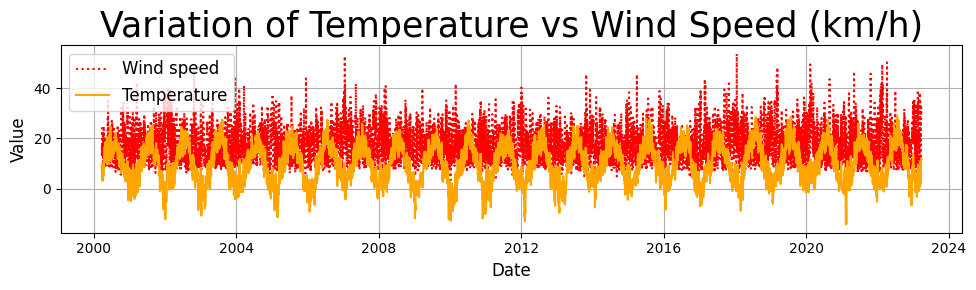

In [20]:
# Plot Wind speed and Temperature
plt.figure(figsize=(10, 3))
plt.plot(ds['Date'], ds['Wind speed'], label='Wind speed', color='red', linestyle='dotted')
plt.plot(ds['Date'], ds['Temperature'], label='Temperature', color='orange')
plt.title('Variation of Temperature vs Wind Speed (km/h)', fontsize=25)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(loc='best', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

Similar to the previous analysis, the plot shows the variation of temperature and Wind speed over time. The orange line represents the variation of temperature, while the red dotted line represents the variation of wind speed

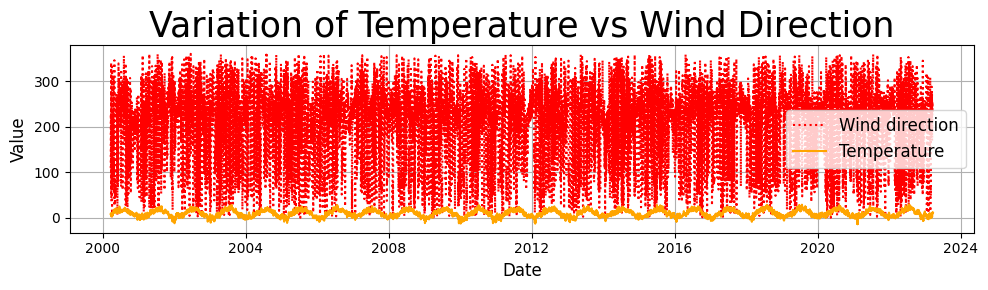

In [21]:
# Plot Wind direction and Temperature
plt.figure(figsize=(10, 3))
plt.plot(ds['Date'], ds['Wind direction'], label='Wind direction', color='red', linestyle='dotted')
plt.plot(ds['Date'], ds['Temperature'], label='Temperature', color='orange')
plt.title('Variation of Temperature vs Wind Direction', fontsize=25)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(loc='best', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

Similar to the previous analysis, the plot shows the variation of temperature and wind direction over time. The orange line represents the variation of temperature, while the red dotted line represents the variation of wind direction. One observation from the plot is that temperature is so low compared by the wind direction is so high.

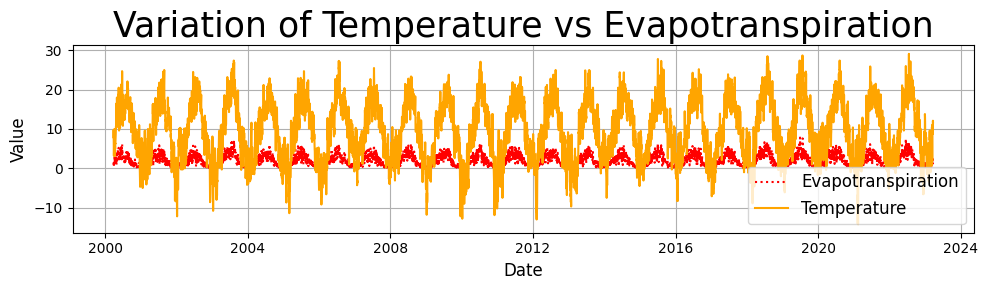

In [22]:
# Plot Evapotranspiration and Temperature
plt.figure(figsize=(10, 3))
plt.plot(ds['Date'], ds['Evapotranspiration'], label='Evapotranspiration', color='red', linestyle='dotted')
plt.plot(ds['Date'], ds['Temperature'], label='Temperature', color='orange')
plt.title('Variation of Temperature vs Evapotranspiration', fontsize=25)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(loc='best', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

Similar to the previous analysis, the plot shows the variation of temperature and Evapotranspiration over time. The orange line represents the variation of temperature, while the red dotted line represents the variation of Evapotranspiration.One observation from the plot is that temperature is so high  compared by the Evapotranspiration is so low.

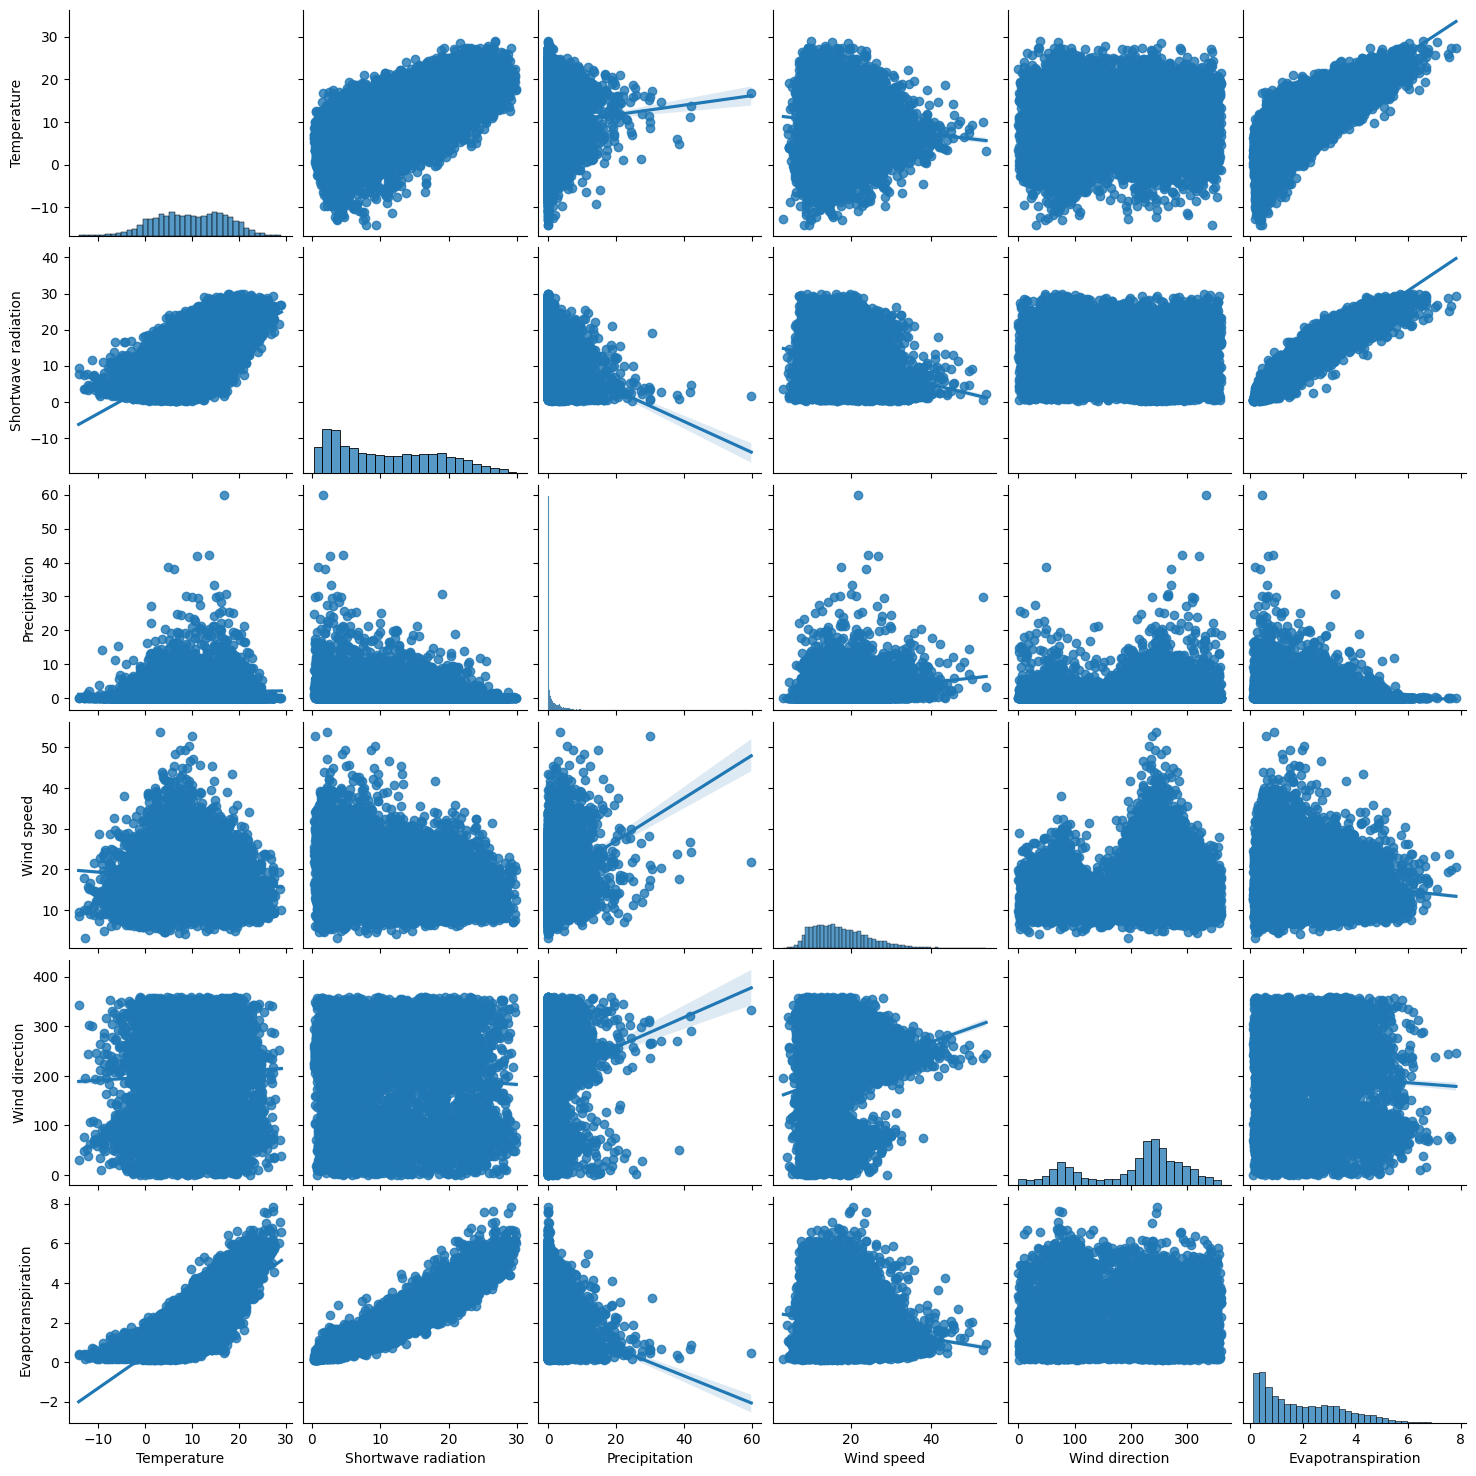

In [23]:
# See picture with scatter or plot method
sns.pairplot(ds, kind="reg")

# Data cleaning

In [24]:
# Count the number of NaN values for each variable
missing_values_count = ds.isnull().sum()

# Calculate the percentage of missing values for each variable
percent_missing = (missing_values_count / len(df)) * 100

# Create a new dataframe to store the results
missing_values = pd.DataFrame({'MissingValues': missing_values_count, 'PercentMissing': percent_missing})

# Print the missing values and percentages
print(missing_values)

                     MissingValues  PercentMissing
Date                             0             0.0
Temperature                      0             0.0
Shortwave radiation              0             0.0
Precipitation                    0             0.0
Wind speed                       0             0.0
Wind direction                   0             0.0
Evapotranspiration               0             0.0


In [25]:
data = ds.drop(columns=['Date'])

In [26]:
# Features chose
X = data.drop(['Temperature'], axis=1)
y = data['Temperature']



In [27]:
# Split data as %20 is test and %80 is train set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Define XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.1)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

In [29]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 2.5919960195154714


In [30]:
# Calculate R2 score
r2 = r2_score(y_test, y_pred)

print("R2 score:", r2)

R2 score: 0.8807127963075997


=> I can't Evaluate the performance of XGBoost model using accuracy, precision, recall, and F1-score because is a metric used for classification problems, where the target variable is categorical.

# Store the weather data in database

In [31]:
# Connect to the database
conn = sqlite3.connect('weather.db')
c = conn.cursor()


In [32]:
# Create a table to store the weather data
conn.execute('''CREATE TABLE IF NOT EXISTS weather
             (Date TEXT, temperature REAL, shortwave_radiation REAL, precipitation REAL,
              wind_speed REAL, wind_direction REAL, evapotranspiration REAL)''')

In [33]:
# insert the data into the table
ds.to_sql('weather_data', conn, if_exists='append', index=False)

8401

**Test weather.db :**

In [34]:
# Define the date you're interested in
Date = '2021-03-29 00:00:00'

# Connect to the database
conn = sqlite3.connect('weather.db')
c = conn.cursor()

# Execute a SELECT query to retrieve the Temperature value for that date
c.execute("SELECT Temperature FROM weather_data WHERE Date = ?", (Date,))

# Fetch the result
result = c.fetchone()

# Check if result is not None before accessing its elements
if result:
    # Print the Temperature value for the specified date
    print(result[0])
else:
    print(f"No temperature data found for date {Date}")

12.0


In [35]:
# commit changes and close the connection
conn.commit()
conn.close()

# Chatbot using & Speech recognition

In [36]:
!sudo apt-get install espeak

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  espeak-data libespeak1 libportaudio2 libsonic0
The following NEW packages will be installed:
  espeak espeak-data libespeak1 libportaudio2 libsonic0
0 upgraded, 5 newly installed, 0 to remove and 49 not upgraded.
Need to get 1,382 kB of archives.
After this operation, 3,178 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libsonic0 amd64 0.2.0-11build1 [10.3 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 espeak-data amd64 1.48.15+dfsg-3 [1,085 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libespeak1 amd64 1.48.15+dfsg-3 [156 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/universe amd64 espeak amd64 1.48.15+dfsg-3 [64.2 kB]
Fetched 1,382 kB in 1s (1,322 

In [37]:
!pip install pyproject.toml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.2 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.1.0
    Uninstalling setuptools-75.1.0:
      Successfully uninstalled setuptools-75.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [45]:

import random
import re
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('weather.db')
c = conn.cursor()

# List of possible responses for each conversation topic
greetings = ["hello", "hi", "hey there", "greetings", "howdy"]
weather_responses = ["The weather is sunny today.",
                     "It's currently raining outside.",
                     "Expect a chance of snow later today.",
                     "It's going to be a hot one today!"]
conversation_responses = ["That's interesting.",
                          "Tell me more about that.",
                          "I see what you mean.",
                          "Interesting point.",
                          "I agree with you.",
                          "That's a unique perspective."]

# Function to respond to user input
def respond(input_text):
    # Check for greetings
    if any(greeting in input_text.lower() for greeting in greetings):
        return random.choice(greetings)
    # Check for weather or temperature inquiries
    elif re.search(r"weather|temperature", input_text.lower()):
        # Extract date from input if provided
        date_match = re.search(r"(\d{4}-\d{2}-\d{2})", input_text)
        if date_match:
            date = date_match.group(1)
            # Call function to get temperature for the specified date
            return get_temperature_response(date)
        else:
            return random.choice(weather_responses)
    # Check for "bye" to close the chat
    elif "bye" in input_text.lower():
        return "bye"
    # Generate response for general conversation topics
    else:
        return random.choice(conversation_responses)

# Function to get temperature for a specific date from SQLite database
def get_temperature_response(date):
    try:
        c.execute("SELECT Temperature FROM weather_data WHERE Date = ?", (date,))
        result = c.fetchone()
        if result:
            temperature = result[0]
            return f"On {date}, the temperature was {temperature} Celsius."
        else:
            return f"No temperature data found for {date}."
    except sqlite3.Error as e:
        print(f"SQLite error: {e}")
        return "Error occurred while fetching data from database."

# Function to handle the chat interaction
def chat():
    print("Chatbot: Hi, how can I help you today?")

    while True:
        input_text = input("User: ")

        if "hello" in input_text.lower():
            print("Chatbot: Hello, how are you doing?")
        elif "how are you" in input_text.lower():
            print("Chatbot: I'm doing great, thanks for asking!")
        elif "what's the weather like today" in input_text.lower():
            print("Chatbot: Sorry, I don't have access to weather information right now.")
        elif "bye" in input_text.lower():
            print("Chatbot: Goodbye! Have a nice day!")
            break
        elif re.search(r"temperature on (\d{4}-\d{2}-\d{2})", input_text.lower()):
            date_match = re.search(r"(\d{4}-\d{2}-\d{2})", input_text.lower())
            date = date_match.group(1)
            response = get_temperature_response(date)
            print("Chatbot:", response)
        else:
            response = respond(input_text)
            if response == "bye":
                print("Chatbot: Goodbye! Have a nice day!")
                break
            else:
                print("Chatbot:", response)

# Run the chat function
chat()

Chatbot: Hi, how can I help you today?
User: how are you
Chatbot: I'm doing great, thanks for asking!
User: Tell me more about weather 
Chatbot: Expect a chance of snow later today.
User: ok, bye
Chatbot: Goodbye! Have a nice day!



# Streamlit app for weather prediction.

In [46]:
! pip install streamlit -q

In [47]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

In [48]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the random forest model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)

# Train the XGBoost model
xgb_model = XGBRegressor(n_estimators=100)
xgb_model.fit(X_train, y_train)

# Train the decision tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Evaluate the performance of the models on the testing set
rf_score = rf_model.score(X_test, y_test)
xgb_score = xgb_model.score(X_test, y_test)
dt_score = dt_model.score(X_test, y_test)

print('Random Forest R-squared:', rf_score)
print('XGBoost R-squared:', xgb_score)
print('Decision Tree R-squared:', dt_score)


Random Forest R-squared: 0.8884912794683006
XGBoost R-squared: 0.8843584198759954
Decision Tree R-squared: 0.7982197708556956


In [50]:
import joblib

# Save the random forest model
joblib.dump(rf_model, 'random_forest_model.joblib')

# Save the XGBoost model
joblib.dump(xgb_model, 'xgboost_model.joblib')

# Save the decision tree model
joblib.dump(dt_model, 'decision_tree_model.joblib')


['decision_tree_model.joblib']

In [51]:
import streamlit as st
import joblib
import numpy as np

# Load the trained models
rf_model = joblib.load('random_forest_model.joblib')
xgb_model = joblib.load('xgboost_model.joblib')
dt_model = joblib.load('decision_tree_model.joblib')

# Set up the Streamlit app
st.title("Weather Prediction App")

# Define the input form
st.write('# Weather Temperature Prediction App')
model_selection = st.sidebar.selectbox('Select Model', ('Random Forest', 'XGBoost', 'Decision Tree'))
sw_rad = st.sidebar.number_input('Shortwave radiation', value=0.0)
precip = st.sidebar.number_input('Precipitation', value=0.0)
wind_speed = st.sidebar.number_input('Wind speed', value=0.0)
wind_dir = st.sidebar.number_input('Wind direction', value=0.0)
evapotrans = st.sidebar.number_input('Evapotranspiration', value=0.0)

# Create the input dataframe
input_df = pd.DataFrame({
    'Shortwave radiation': [sw_rad],
    'Precipitation': [precip],
    'Wind speed': [wind_speed],
    'Wind direction': [wind_dir],
    'Evapotranspiration': [evapotrans]
})

# Define the model and predict the temperature
if model_selection == 'Random Forest':
    model = rf_model
elif model_selection == 'XGBoost':
    model = xgb_model
else:
    model = dt_model

prediction = model.predict(input_df)

# Display the results
st.write('## Prediction Results')
st.write('Model:', model_selection)
st.write('Temperature:', round(prediction[0], 2))



2024-12-07 08:42:17.957 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-07 08:42:18.144 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-12-07 08:42:18.153 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-07 08:42:18.157 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-07 08:42:18.159 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-07 08:42:18.161 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-07 08:42:18.162 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-07 08:42:18.168 Thread 'MainThread': mi

In [52]:

%%writefile app.py

import streamlit as st
import pandas as pd
import joblib
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Load the trained models
rf_model = joblib.load('random_forest_model.joblib')
xgb_model = joblib.load('xgboost_model.joblib')
dt_model = joblib.load('decision_tree_model.joblib')

# Define the input features
features = ['Shortwave radiation', 'Precipitation', 'Wind speed', 'Wind direction', 'Evapotranspiration']

# Create the sidebar for selecting the model
model_select = st.sidebar.selectbox("Select a model", ["Random Forest", "XGBoost", "Decision Tree"])

# Define the function to make predictions
def predict(model, features):
    if model == "Random Forest":
        return rf_model.predict(features)
    elif model == "XGBoost":
        return xgb_model.predict(features)
    else:
        return dt_model.predict(features)

# Create the main app
def main():
    st.title("Weather Prediction App")
    st.write("This app predicts the temperature based on weather data.")

    # Create the input form
    form = st.form(key='my-form')
    swr = form.number_input('Shortwave radiation', min_value=0.0, step=0.01)
    precip = form.number_input('Precipitation', min_value=0.0, step=0.01)
    ws = form.number_input('Wind speed', min_value=0.0, step=0.01)
    wd = form.number_input('Wind direction', min_value=0, step=1)
    et = form.number_input('Evapotranspiration', min_value=0.0, step=0.01)
    submit_button = form.form_submit_button(label='Predict')

    # Get the input data and make the prediction
    if submit_button:
        data = [[swr, precip, ws, wd, et]]
        df = pd.DataFrame(data, columns=features)
        try:
            prediction = predict(model_select, df)
            st.write("The predicted temperature is ", round(prediction[0], 2), "degrees Celsius.")
        except Exception as e:
            st.error(f"Error: {str(e)} Please check your input data and try again.")

if __name__ == '__main__':
    main()

Writing app.py


In [55]:
!pip install streamlit
!npm install -g localtunnel


⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼
added 22 packages in 3s
⠼
⠼3 packages are looking for funding
⠼  run `npm fund` for details
⠼

In [67]:
!streamlit run app.py





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.74.23.226:8501

  Stopping...
  Stopping...
